In [1]:
# Many EEG signals including biological artifacts reflect non-Gaussian processes.
# Therefore PCA-based artifact rejection will likely perform worse at separating the signal from noise sources.
# Example:Imagine 3 instruments playing simultaneously and 3 microphones recording mixed signals.
# ICA can be used to recover the sources, what is played by each instrument

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA, PCA

In [2]:
np.random.seed(0) #set seed for reproducible results
n_samples = 2000
time = np.linspace(0, 8, n_samples)

In [3]:
s1 = np.sin(2 * time) # Signal 1:sinusoidal signal
s2 = np.sign(np.sin(3 * time)) # Signal 2:square signal
s3 = signal.sawtooth(2 * np.pi * time) # Signal 3:sawtooth signal

In [4]:
S = np.c_[s1,s2,s3]
S += 0.2 * np.random.normal(size=S.shape) # Add noise

In [5]:
S /= S.std(axis=0) # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1.0],[1.5, 1.0, 2.0]]) #Mixing matrix
X = np.dot(S, A.T) #Generate observations

In [8]:
X

array([[-0.74486315, -0.91401507, -1.81570038],
       [ 0.03932519,  1.06492993, -1.58715033],
       [-0.40766041,  0.39786915, -1.90998106],
       ...,
       [ 0.23856791, -0.28486909,  1.38619226],
       [-0.00653213, -0.99317023,  1.48134842],
       [-3.00301507, -3.62816891, -4.8258685 ]])

In [9]:
# compute ICA
ica = FastICA(n_components = 3)
S_ = ica.fit_transform(X) #get the estimated sources
A_ = ica.mixing_ #get estimated mixing matrix

# compute PCA
pca = PCA(n_components = 3)
H = pca.fit_transform(X) #estimate PCA sources
plt.figure(figsize=(9, 6))

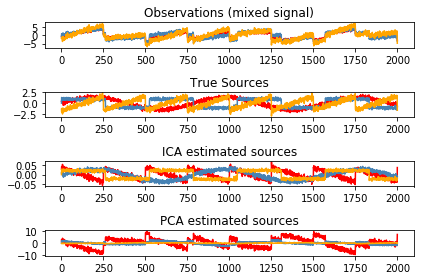

In [12]:
models = [X,S,S_,H]
names = ['Observations (mixed signal)', 'True Sources',
        'ICA estimated sources', 'PCA estimated sources']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4, 1, ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color = color)
plt.tight_layout()
plt.show()

In [13]:
# PCA fails at recovering our "Instruments" since the related signals reflect non-Gaussian processes.